## Importing the Librares

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [21]:
df3 = pd.read_csv(r"C:\Data_Analyst_Power_BI\Internship_Project_Unified\IBM HR Analytics\Data\data_EDA.csv")
df3.head()

,Age,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobInvolvement,JobRole,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsInCurrentRole
0,0.446350,Yes,2,2,1,1,0,0.379672,7,2,-0.108350,1,-1.150554,-1.584178,-2.493820,-0.063296
1,1.322365,No,1,1,0,1,1,-1.026167,6,1,-0.291719,0,2.129306,1.191438,0.338096,0.764998
2,0.008343,Yes,2,1,1,4,1,-1.026167,2,2,-0.937654,1,-0.057267,-0.658973,0.338096,-1.167687
3,-0.429664,No,1,1,3,1,0,0.379672,6,1,-0.763634,1,-1.150554,0.266233,0.338096,0.764998
4,-1.086676,No,2,1,0,3,1,0.379672,2,1,-0.644858,0,-0.877232,1.191438,0.338096,-0.615492


### Using Cross Validation to check the model performance

In [22]:
#Manually encode the target variable 'Attrition'
df3['Attrition'] = df3['Attrition'].map({'Yes': 1, 'No': 0})

# Separating features and target
X = df3.drop('Attrition', axis=1)
y = df3['Attrition']

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Perform 5-Fold Cross Validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f} | Std Dev = {scores.std():.4f}")

Logistic Regression: Mean Accuracy = 0.8510 | Std Dev = 0.0189
Random Forest: Mean Accuracy = 0.8565 | Std Dev = 0.0104
SVM: Mean Accuracy = 0.8395 | Std Dev = 0.0025


C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:32:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:32:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:32:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:32:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

XGBoost: Mean Accuracy = 0.8544 | Std Dev = 0.0148


### Since the data for Attrition is Imbalaced, using class balancing techniques

In [23]:
class_ratio = y.value_counts()
pos_weight = class_ratio[0] / class_ratio[1]  # Majority / Minority

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc'
}

# Define models with class balancing
models = {
    "Random Forest (Balanced)": RandomForestClassifier(
        n_estimators=200, class_weight='balanced', random_state=42
    ),
    "XGBoost (Balanced)": XGBClassifier(
        use_label_encoder=False, eval_metric='logloss',
        scale_pos_weight=pos_weight, random_state=42
    )
}

#Cross-validation and results
results = {}
for name, model in models.items():
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)
    results[name] = {metric: scores[f'test_{metric}'].mean() for metric in scoring.keys()}

#Create comparison DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Comparison with Class Balancing (5-Fold CV):")
print(results_df)

C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:32:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:32:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:32:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:32:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,


Model Comparison with Class Balancing (5-Fold CV):
                          accuracy  precision    recall        f1   roc_auc
Random Forest (Balanced)  0.854422   0.744762  0.168617  0.271149  0.780752
XGBoost (Balanced)        0.844898   0.540505  0.400975  0.454294  0.761463


#### Since, XGBoost gives higher recall value than Random Forest we will choose XGBoost

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(y.value_counts()[0] / y.value_counts()[1]),  # Handle imbalance
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:32:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       247
           1       0.42      0.32      0.36        47

    accuracy                           0.82       294
   macro avg       0.65      0.62      0.63       294
weighted avg       0.80      0.82      0.81       294


Confusion Matrix:
 [[226  21]
 [ 32  15]]

ROC-AUC Score: 0.7699198897407185


In [25]:
#Handling Data Imbalance and initializing the model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(y.value_counts()[0] / y.value_counts()[1]),  # Handle imbalance
    random_state=42
)

xgb.fit(X_train, y_train)


C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:32:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [26]:
#Training the model
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       247
           1       0.42      0.32      0.36        47

    accuracy                           0.82       294
   macro avg       0.65      0.62      0.63       294
weighted avg       0.80      0.82      0.81       294


Confusion Matrix:
 [[226  21]
 [ 32  15]]

ROC-AUC Score: 0.7699198897407185


ROC-AUC Score: 0.770


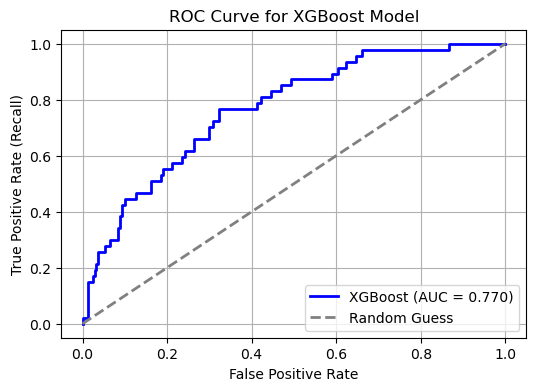

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
# Probability of class 1 (Attrition)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]  

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'XGBoost (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate (Recall)', fontsize=10)
plt.title('ROC Curve for XGBoost Model', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [28]:
#Using Gridsearch CV to find best parameteres for the model

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                  scale_pos_weight=pos_weight, random_state=42),
    param_grid, cv=5, scoring='f1', n_jobs=-1
)

grid.fit(X, y)

print("Best Parameters:", grid.best_params_)
print("Best F1-Score:", grid.best_score_)

C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:35:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best F1-Score: 0.526352409505631


In [29]:
best_params = grid.best_params_

xgb_best = XGBClassifier(
    **best_params,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(y.value_counts()[0] / y.value_counts()[1]),
    random_state=42
)
xgb_best.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:35:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [30]:
print(list(X.columns))

['Age', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobInvolvement', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'WorkLifeBalance', 'YearsInCurrentRole']


In [31]:
#Predicting with a dummy data

dummy_data = pd.DataFrame([{
    'Age': 1.236633,
    'BusinessTravel': 4,
    'Department': 4,
    'Education': 1,
    'EducationField': 4,
    'Gender': 1,
    'JobInvolvement': -0.878223,
    'JobRole': 3,
    'MaritalStatus': 1 ,
    'MonthlyIncome': 0.886087,
    'OverTime': 1, # Encoded (1 = Yes, 0 = No)
    'PercentSalaryHike': -0.387686,
    'RelationshipSatisfaction': 0.523418,
    'WorkLifeBalance': 1.538292,
    'YearsInCurrentRole': 0.382502
}])


In [32]:
# Predict probability and class
pred_class = xgb_best.predict(dummy_data)
pred_proba = xgb_best.predict_proba(dummy_data)

print(f"Predicted Class: {pred_class[0]}")  # 1 = Attrition, 0 = No Attrition
print(f"Probability of Attrition: {pred_proba[0][1]:.2f}")

Predicted Class: 0
Probability of Attrition: 0.29


In [20]:
import joblib
joblib.dump(xgb_best, "xgboost_attrition_model.pkl")

['xgboost_attrition_model.pkl']